<a href="https://colab.research.google.com/github/ngzhiwei517/Machine_Learning_Self-Learn/blob/main/KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
df[df.target==1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [10]:
df['flower_name']=df['target'].apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


Text(0, 0.5, 'Sepal width(cm)')

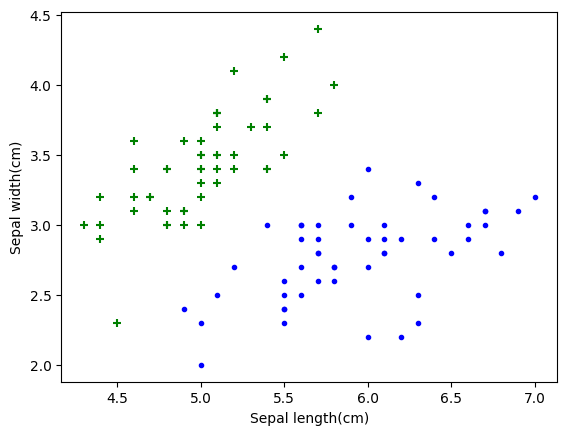

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='g',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='b',marker='.')
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')


**Petal length vs Pepal Width (Setosa vs Versicolor)**

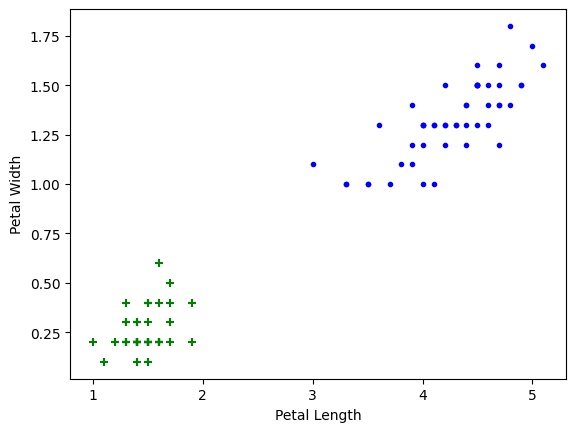

In [12]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [17]:
X=df.drop(['target','flower_name'],axis=1)
y=df.target

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30) #trial and error to find the best k


In [24]:

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [25]:
knn.score(X_test, y_test)

0.9666666666666667

In [46]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6
141,6.9,3.1,5.1,2.3
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
120,6.9,3.2,5.7,2.3


In [47]:
from sklearn.metrics import confusion_matrix
y_predicted=knn.predict(X_test)
y_predicted

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [50]:
#confusion matrix(prediction,truth)
cm=confusion_matrix(y_predicted,y_test)
cm

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  6]])

Text(58.222222222222214, 0.5, 'Truth')

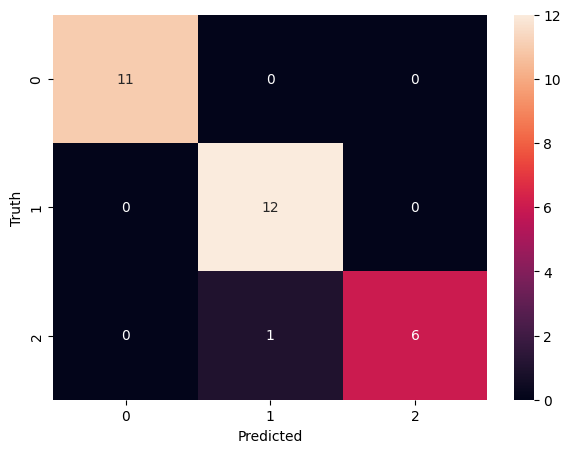

In [51]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Print classification report for precesion, recall and f1-score for each classes

In [53]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# KNN with grid search CV to find the best n_neighbour

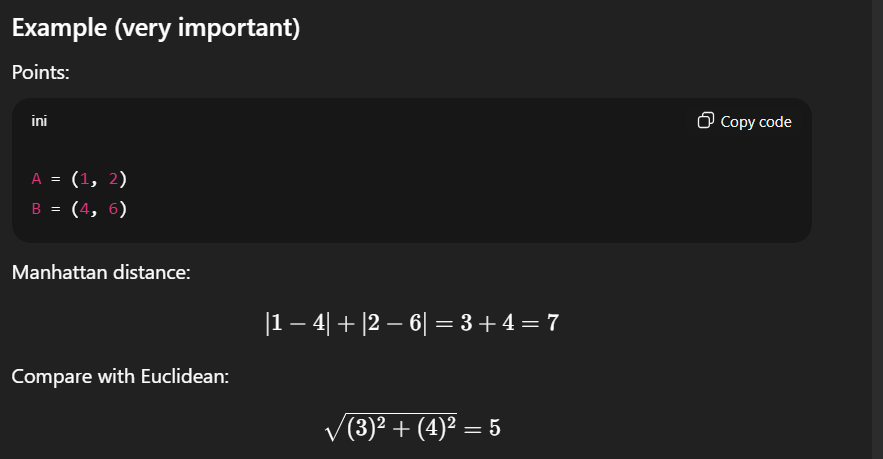

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

In [36]:
clf=GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors':[3,15,30,45],
    'metric':['euclidean','manhattan']
},cv=5)

In [37]:
digit=load_digits()
clf.fit(digit.data,digit.target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 15, 30, 45]})

In [45]:
import pandas as pd
df=pd.DataFrame(clf.cv_results_)
df
df[['param_metric','param_n_neighbors','mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,euclidean,3,0.966622
1,euclidean,15,0.954383
2,euclidean,30,0.941024
3,euclidean,45,0.931004
4,manhattan,3,0.956608
5,manhattan,15,0.945483
6,manhattan,30,0.936018
7,manhattan,45,0.922657


In [42]:
print('Best score:',clf.best_score_)
print('Best parameter:',clf.best_params_)

Best score: 0.966621788919839
Best parameter: {'metric': 'euclidean', 'n_neighbors': 3}
